# WeRateDogs

In [571]:
import pandas as pd
import requests
import json as js
import numpy as np
import matplotlib.pyplot as plt
import tweepy as tw
import os
import seaborn as sns
from bs4 import BeautifulSoup as bs



# Gathering data

### Enhanced Twitter Archive

In [572]:
#load twitter archive file into pandas df.
df_arch = pd.read_csv('E:/FWD/dogs/twitter-archive-enhanced.csv')

### Image Predictions File

In [573]:
#download image predictions file.
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

# GET the file name programmatically
file_name = url.split('/')[-1]

# Write the file with the context manager with:
with open(file_name, 'wb') as file:
     file.write(response.content)

In [574]:
# load image predictions file into pandas df.
df_pred = pd.read_csv('image-predictions.tsv', sep='\t')

### Download Tweet JSON Data

##### unfortunatly my twitter developer account isnt verified yet so rather I am typing the code but I am using the file downladed from calssroom

In [575]:
#consumer_key= '!!!!!!!!!'
#consumer_secret= '!!!!!!!!!'
#access_token= '!!!!!-!!!!!!!'
#access_token_secret= '!!!!!!!!!'

#auth = tw.OAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_token, access_token_secret)
#api = tw.API(auth, wait_on_rate_limit=True)

In [577]:
#loading tweets json into list and get only tweet id, retweet count, favorite count 

tweet_json = []
with open('E:/FWD/dogs/tweet-json.txt') as file:
    for line in file:
        lin = js.loads(line)
        tweet_json.append({'tweet_id':lin['id'],
                           'retweet_count':lin['retweet_count'],
                           'favorite_count':lin['favorite_count']})

In [578]:
#convert tweet_json list to dataframe
df_j = pd.DataFrame(tweet_json, columns = ['tweet_id', 'retweet_count', 'favorite_count'])


# Assess Data

#### After assessing data visually through text editor, we will assess data through some pandas functions


In [579]:
df_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [580]:
df_arch.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [581]:
df_arch.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [582]:
df_arch.rating_numerator.describe()

count    2356.000000
mean     13.126486  
std      45.876648  
min      0.000000   
25%      10.000000  
50%      11.000000  
75%      12.000000  
max      1776.000000
Name: rating_numerator, dtype: float64

In [583]:
df_arch[df_arch.rating_numerator<(10)].count()[0]

440

In [584]:
df_arch[df_arch.rating_numerator<(10)].tweet_id

45      883482846933004288
229     848212111729840128
315     835152434251116546
387     826598799820865537
462     817502432452313088
               ...        
2351    666049248165822465
2352    666044226329800704
2353    666033412701032449
2354    666029285002620928
2355    666020888022790149
Name: tweet_id, Length: 440, dtype: int64

In [585]:
df_arch.rating_denominator.describe()

count    2356.000000
mean     10.455433  
std      6.745237   
min      0.000000   
25%      10.000000  
50%      10.000000  
75%      10.000000  
max      170.000000 
Name: rating_denominator, dtype: float64

In [586]:
df_arch[df_arch.rating_denominator!=10].count()[0]

23

In [587]:
df_arch[df_arch.rating_denominator==0].count()[0]

1

In [588]:
df_arch.name.value_counts()

None         745
a            55 
Charlie      12 
Oliver       11 
Lucy         11 
             .. 
Napolean     1  
Rumble       1  
Hubertson    1  
Livvie       1  
Robin        1  
Name: name, Length: 957, dtype: int64

In [589]:
df_arch.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [590]:
df_arch.name.value_counts()

None         745
a            55 
Charlie      12 
Oliver       11 
Lucy         11 
             .. 
Napolean     1  
Rumble       1  
Hubertson    1  
Livvie       1  
Robin        1  
Name: name, Length: 957, dtype: int64

In [591]:
df_pred.head(100)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
95,667550904950915073,https://pbs.twimg.com/media/CUOb_gUUkAACXdS.jpg,1,web_site,0.999335,False,vizsla,0.000081,True,collie,0.000069,True
96,667724302356258817,https://pbs.twimg.com/media/CUQ7tv3W4AA3KlI.jpg,1,ibex,0.619098,False,bighorn,0.125119,False,ram,0.074673,False
97,667728196545200128,https://pbs.twimg.com/media/CUQ_QahUAAAVQjn.jpg,1,kuvasz,0.360159,True,golden_retriever,0.293744,True,Labrador_retriever,0.270673,True
98,667766675769573376,https://pbs.twimg.com/media/CURiQMnUAAAPT2M.jpg,1,fire_engine,0.883493,False,tow_truck,0.074734,False,jeep,0.012773,False


In [592]:
df_pred.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1905,852226086759018497,https://pbs.twimg.com/ext_tw_video_thumb/852223481894903808/pu/img/JWNq40ol4DXvHoUP.jpg,1,prison,0.352793,False,dishwasher,0.110723,False,file,0.094112,False
1356,760539183865880579,https://pbs.twimg.com/media/Co36VZfWcAEN3R3.jpg,1,Samoyed,0.988013,True,malamute,0.004518,True,West_Highland_white_terrier,0.001189,True
87,667524857454854144,https://pbs.twimg.com/media/CUOGUfJW4AA_eni.jpg,1,hare,0.447893,False,dhole,0.092435,False,Chesapeake_Bay_retriever,0.088122,True
1254,748324050481647620,https://pbs.twimg.com/media/CmKUwImXIAA58f5.jpg,1,Shetland_sheepdog,0.880499,True,collie,0.107901,True,Pembroke,0.003607,True
1909,852912242202992640,https://pbs.twimg.com/media/C9YnKK3VoAAxn1E.jpg,1,Great_Dane,0.783765,True,Rhodesian_ridgeback,0.114147,True,English_foxhound,0.046440,True
204,669753178989142016,https://pbs.twimg.com/media/CUtw9SAVEAAtFUN.jpg,1,Pembroke,0.858494,True,hamster,0.026319,False,Shetland_sheepdog,0.022405,True
793,690735892932222976,https://pbs.twimg.com/media/CZX8nyeVAAEstKM.jpg,1,golden_retriever,0.883229,True,Labrador_retriever,0.109635,True,kuvasz,0.002795,True
1201,741067306818797568,https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg,1,golden_retriever,0.843799,True,Labrador_retriever,0.052956,True,kelpie,0.035711,True
1269,749774190421639168,https://pbs.twimg.com/media/Cme7pg2XEAATMnP.jpg,1,Pekinese,0.879012,True,Chihuahua,0.054855,True,Blenheim_spaniel,0.021041,True
1227,745314880350101504,https://pbs.twimg.com/media/Clfj6RYWMAAFAOW.jpg,2,ice_bear,0.807762,False,great_white_shark,0.027040,False,fountain,0.022052,False


In [593]:
df_pred.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [594]:
df_pred.loc[597,'jpg_url']

'https://pbs.twimg.com/media/CW4tL1vWcAIw1dw.jpg'

In [595]:
from IPython.display import Image
Image(url='https://pbs.twimg.com/media/CW4tL1vWcAIw1dw.jpg')

In [596]:
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [597]:
df_j.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


# Cleaning


### Make a copy for for being in the safe side

In [598]:
df_arch_c = df_arch.copy()
df_pred_c = df_pred.copy()
df_j_c = df_j.copy()

# Define

#### merging the 3 sources of data in one data frame, we will make thin on 2 stages

## Code

In [599]:
tweets = df_arch_c.merge(df_pred_c, how = 'left', on = 'tweet_id')

In [600]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [601]:
tweets = tweets.merge(df_j_c, how = 'left', on = 'tweet_id')


In [602]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [603]:
tweets.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8853.0,39467.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6514.0,33819.0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4328.0,25461.0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964.0,42908.0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774.0,41048.0


# Define

#### Name contain a lot of invalid names

# Code

In [604]:
lowercase_names = []
for row in tweets['name']:
    if row[0].islower() and row not in lowercase_names:
        lowercase_names.append(row)
print(lowercase_names)

['such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad', 'an', 'very', 'just', 'my', 'his', 'actually', 'getting', 'this', 'unacceptable', 'all', 'old', 'infuriating', 'the', 'by', 'officially', 'life', 'light', 'space']


In [605]:
# Replacing these values with NaN
tweets['name'].replace(lowercase_names, 
                        np.nan,
                       inplace = True)

# Replace all 'None's with NaN
tweets['name'].replace('None', 
                        np.nan,
                       inplace = True)

# Test

In [606]:
tweets['name'].value_counts()

Charlie      12
Cooper       11
Oliver       11
Lucy         11
Penny        10
             ..
Napolean     1 
Rumble       1 
Hubertson    1 
Tove         1 
Shooter      1 
Name: name, Length: 931, dtype: int64

# Define

#### Some numerator incorrect values

# Code

In [607]:
#determination of the wrong numerator rows
tweets.loc[tweets.rating_denominator!=10,['tweet_id','text','rating_numerator','rating_denominator']]

,tweet_id,text,rating_numerator,rating_denominator
313,835246439529840640,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960,0
342,832088576586297345,@docmisterio account started on 11/15/15,11,15
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
784,775096608509886464,"RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",9,11
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
1068,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
1120,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
1202,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50


#### By eye notice, these tweet_id where the problem found

In [608]:
tweets.loc[tweets.tweet_id == 740373189193256964, ['rating_numerator']] = 14
tweets.loc[tweets.tweet_id == 722974582966214656, ['rating_numerator']] = 13
tweets.loc[tweets.tweet_id == 716439118184652801, ['rating_numerator']] = 11
tweets.loc[tweets.tweet_id == 682962037429899265, ['rating_numerator']] = 10
tweets.loc[tweets.tweet_id == 666287406224695296, ['rating_numerator']] = 9

# Define

#### The dogs names aren’t consistent. A lot of differs in formatting lower/ upper case

# Code

In [609]:

tweets['name'] = tweets.name.str.capitalize()

In [610]:
tweets['name'].str.islower().sum()

0

# Test

In [611]:
tweets['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', nan, 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Lilly',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot',
       'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Emmy',
       'Steven', 'Beau', 'Snoopy', 'Shadow', 'Terrance', 'Aja', 'Penny',
       'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget',
       'Cash', 'Coco', 'Jed', 'Sebastian', 'Walter', 'Sierra', 'Monkey',
       'Harry', 'Kody', 'Lassie', 'Rover', 'Napolean', 'Dawn', 'Boomer',
       'Cody', 'Rumble', 'Clifford', 'Dewey', 'Scout', 'Gizmo', 'Cooper',
       'Harold', 'Shikha', 'Jamesy', 'Lili', 'Sammy', 'Meatball',
       'Paisley', 'Albus', 'Neptune', 'Quinn', 'Belle', 'Zooey',

#### we can notice that the values with lower case dissappeared by the previous function witch we used to remove the invalid names

# Define

#### removing duplicates by using .drop

# Code

In [612]:
# drop the duplicates due to join
tweets = tweets.drop_duplicates()

# Define

#### retweets can affect results, so we would remove it

# Code

In [613]:
#remove retweets that could affect results
tweets.drop(tweets[tweets['retweeted_status_id'].notnull()==True].index, inplace=True)

#### Some string in p1, p2 and p3 are captalizaed, and some are not.

In [614]:
tweets['p1'] = tweets['p1'].str.lower()
tweets['p2'] = tweets['p2'].str.lower()
tweets['p3'] = tweets['p3'].str.lower()

In [616]:
tweets.sample()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
923,755955933503782912,NaN,NaN,2016-07-21 02:41:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a frustrated pupper attempting to escape a pool of Frosted Flakes. 12/10 https://t.co/GAYViEweWr,NaN,NaN,NaN,https://twitter.com/dog_rates/status/755955933503782912/video/1,...,0.596882,True,maltese_dog,0.176478,True,great_pyrenees,0.026775,True,3285.0,8092.0


## Define

#### Iterate through each row and extract the source's text with beautiful soup

## Code

In [621]:
new_source = []
for line, row in tweets.iterrows():
    soup = bs(row.source)
    x = soup.find('a').contents[0]
    new_source.append(x)
    
tweets['source'] = new_source

In [624]:
pd.Series(new_source).value_counts()

Twitter for iPhone     2042
Vine - Make a Scene    91  
Twitter Web Client     31  
TweetDeck              11  
dtype: int64

In [625]:
pd.pivot_table(tweets, index=['doggo', 'floofer', 'pupper', 'puppo'],values = 'tweet_id', aggfunc='count')

tweet_id
doggo floofer pupper puppo          
None  None    None   None   1831    
                     puppo  24      
              pupper None   224     
      floofer None   None   9       
doggo None    None   None   75      
                     puppo  1       
              pupper None   10      
      floofer None   None   1

## Define

#### 4 different columns (doggo, floofer, pupper, and puppo) can be concatenated in just a column.

## Code

In [626]:
# Extract doggo, floofer, pupper and puppo columns into new 'dog_stage' column 
tweets['doggy_meter'] = tweets['text'].str.extract('(doggo|floofer|pupper|puppo)')

In [627]:
# Drop doggo, floofer, pupper, and puppo columns
tweets= tweets.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

In [628]:
tweets.sample(50)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,doggy_meter
1969,673317986296586240,NaN,NaN,2015-12-06 01:48:12 +0000,Twitter for iPhone,Take a moment and appreciate how these two dogs fell asleep. Simply magnificent. 10/10 for both https://t.co/juX48bWpng,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/673317986296586240/photo/1,https://twitter.com/dog_rates/status/673317986296586240/photo/1",...,True,bloodhound,0.079923,True,rottweiler,0.068594,True,293.0,924.0,NaN
1252,710844581445812225,NaN,NaN,2016-03-18 15:05:29 +0000,Twitter for iPhone,This is Staniel. His selfie game is strong af. 10/10 I'd snapchat with Staniel https://t.co/UgkTw7TKyM,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710844581445812225/photo/1,...,False,pembroke,0.200407,True,basenji,0.060734,True,779.0,2775.0,NaN
350,831552930092285952,NaN,NaN,2017-02-14 17:17:22 +0000,Twitter for iPhone,This is Dutch. He dressed up as his favorite emoji for Valentine's Day. I've got heart eyes for his heart eyes. 13/10 https://t.co/BCbmFYLrse,NaN,NaN,NaN,https://twitter.com/dog_rates/status/831552930092285952/photo/1,...,True,pembroke,0.161442,True,french_bulldog,0.092143,True,2632.0,9872.0,NaN
1720,680145970311643136,NaN,NaN,2015-12-24 22:00:10 +0000,Twitter for iPhone,Say hello to Kawhi. He was doing fine until his hat fell off. He got it back though. 10/10 deep breaths pupper https://t.co/N5pM6WBx7e,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/680145970311643136/photo/1,https://twitter.com/dog_rates/status/680145970311643136/photo/1,https://twitter.com/dog_rates/status/680145970311643136/photo/1",...,True,toy_poodle,0.226481,True,maltese_dog,0.067682,True,1972.0,3955.0,pupper
1838,675898130735476737,NaN,NaN,2015-12-13 04:40:46 +0000,Twitter for iPhone,I'm sure you've all seen this pupper. Not prepared at all for the flying disc of terror. 10/10 https://t.co/G0pQiFGM7O,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675898130735476737/photo/1,...,True,malinois,0.077037,True,pug,0.074597,True,653.0,1774.0,pupper
1230,713411074226274305,NaN,NaN,2016-03-25 17:03:49 +0000,Twitter for iPhone,Here we see an extremely rare Bearded Floofmallow. Only a few left in the wild. 11/10 would pet with a purpose https://t.co/jVJJKlPbvq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713411074226274305/photo/1,...,True,samoyed,0.129542,True,kuvasz,0.122451,True,1440.0,4802.0,NaN
674,789599242079838210,NaN,NaN,2016-10-21 22:48:24 +0000,Twitter for iPhone,This is Brownie. She's wearing a Halloween themed onesie. 12/10 festive af https://t.co/0R4meWXFOx,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/789599242079838210/photo/1,https://twitter.com/dog_rates/status/789599242079838210/photo/1",...,True,beagle,0.018570,True,labrador_retriever,0.017499,True,2279.0,7620.0,NaN
1652,683481228088049664,NaN,NaN,2016-01-03 02:53:17 +0000,Twitter for iPhone,Meet Banjo. He's a Peppercorn Shoop Da Whoop. Nails look lethal. Skeptical of luminescent orb 11/10 stay woke pupper https://t.co/H7NZFumpKq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/683481228088049664/photo/1,...,True,chow,0.442016,True,german_shepherd,0.013206,True,1118.0,2878.0,pupper
1057,742150209887731712,NaN,NaN,2016-06-13 00:22:53 +0000,Twitter for iPhone,This is Edmund. He sends stellar selfies. Cute af. 8/10 would totally snapchat with this pupper https://t.co/PprXoqZuKY,NaN,NaN,NaN,https://twitter.com/dog_rates/status/742150209887731712/photo/1,...,False,french_bulldog,0.071414,True,hog,0.062465,False,1783.0,5661.0,pupper
729,781955203444699136,NaN,NaN,2016-09-30 20:33:43 +0000,Twitter for iPhone,This is Chipson. He weighed in at .3 ounces and is officially super h*ckin smol. Space-saving af. 11/10 would snug delicately https://t.co/FjEsk7A1JV,NaN,NaN,NaN,https://twitter.com/dog_rates/status/781955203444699136/photo/1,...,False,din

#### some unusefull columns needed to be droped

In [629]:
tweets = tweets.drop(['retweeted_status_user_id', 
                        'retweeted_status_timestamp',
                          'in_reply_to_status_id',
                          'in_reply_to_user_id',
                        'retweeted_status_id' ], axis=1)

##### timestamp is object, not a datatime and needed to be converted

In [630]:
tweets['timestamp'] = pd.to_datetime(tweets['timestamp'])

In [631]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   int64              
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   object             
 3   text                2175 non-null   object             
 4   expanded_urls       2117 non-null   object             
 5   rating_numerator    2175 non-null   int64              
 6   rating_denominator  2175 non-null   int64              
 7   name                1391 non-null   object             
 8   jpg_url             1994 non-null   object             
 9   img_num             1994 non-null   float64            
 10  p1                  1994 non-null   object             
 11  p1_conf             1994 non-null   float64            
 12  p1_dog              1994 non-null 

##### we only need original tweets with images, witch make we drop tweets without images('expanded_urls' is NaN)

In [632]:
tweets= tweets.dropna(subset = ['expanded_urls'])

In [633]:
tweets.expanded_urls.isnull().sum()

0

#### Some string in p1, p2 and p3 are captalizaed, and some are not.

In [634]:
tweets['p1'] = tweets['p1'].str.lower()
tweets['p2'] = tweets['p2'].str.lower()
tweets['p3'] = tweets['p3'].str.lower()

In [635]:
tweets.to_csv('tweets.csv', index=False)

In [636]:
tweets.sample()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,doggy_meter
1303,707420581654872064,2016-03-09 04:19:44+00:00,Twitter for iPhone,This is Keurig. He's a rare dog. Laughs like an idiot tho. Head is basically a weapon. Poorly maintained goatee 4/10 https://t.co/xOrUyj7K30,https://twitter.com/dog_rates/status/707420581654872064/photo/1,4,10,Keurig,https://pbs.twimg.com/media/CdFDQVgWIAArslx.jpg,1.0,...,False,kuvasz,0.149391,True,great_pyrenees,0.106003,True,789.0,2499.0,NaN


# Saving the new csv

In [647]:
tweets.to_csv('tweets.csv', index=False)

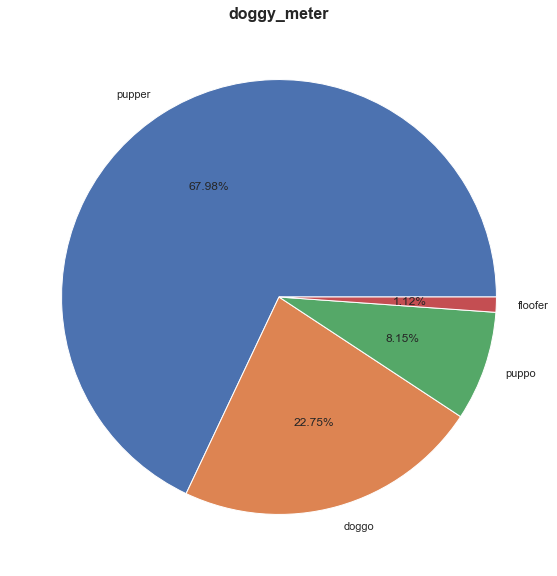

In [641]:
#showing a Pie chart for the doggy meter
tweets['doggy_meter'].value_counts().plot(kind='pie', autopct='%.2f%%', figsize=(10,10))

plt.ylabel('')
plt.title('doggy_meter', weight='bold', fontsize=16);

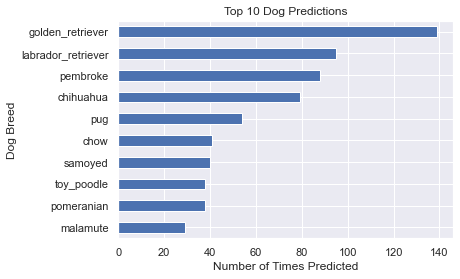

In [643]:
#Make a bar plot for top 10 dog breeds
tweets['p1'].value_counts()[9::-1].plot(kind='barh')
plt.title('Top 10 Dog Predictions')
plt.xlabel('Number of Times Predicted')
plt.ylabel('Dog Breed')
plt.fontsize = 12

Twitter for iPhone     1985
Vine - Make a Scene    91  
Twitter Web Client     30  
TweetDeck              11  
Name: source, dtype: int64


Text(0.5, 1.0, 'The Distribution of Source')

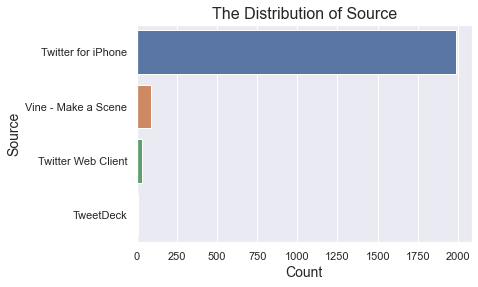

In [644]:
sorted_source = tweets['source'].value_counts().index
print(tweets['source'].value_counts())
sns.set(style="darkgrid")
sns.countplot(data = tweets, y = 'source', order = sorted_source)
plt.xticks(rotation = 360)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Source', fontsize=14)
plt.title('The Distribution of Source',fontsize=16)

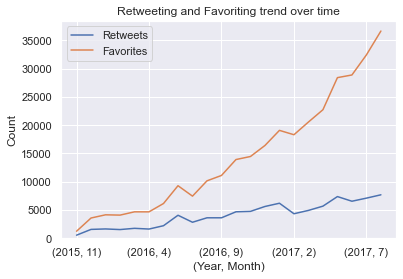

In [645]:
plt.subplots(1, sharex=True)
tweets.retweet_count.groupby([tweets["timestamp"].dt.year, tweets["timestamp"].dt.month]).mean().plot(kind='line')
tweets.favorite_count.groupby([tweets["timestamp"].dt.year, tweets["timestamp"].dt.month]).mean().plot(kind='line').set_ylim(0, )
plt.title('Retweeting and Favoriting trend over time')
plt.ylabel('Count')
plt.xlabel('(Year, Month)')
plt.legend(('Retweets', 'Favorites'))
plt.savefig('ret_fav')

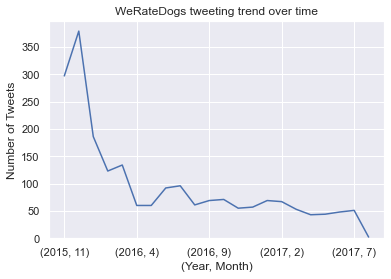

In [646]:
data = tweets.tweet_id.groupby([tweets["timestamp"].dt.year, tweets["timestamp"].dt.month]).count()
ax = data.plot(kind='line', title='WeRateDogs tweeting trend over time')
ax.set_xlabel("(Year, Month)")
ax.set_ylabel("Number of Tweets")
ax.set_ylim(0, )
plt.savefig('tweet_trend')